In [90]:
import pandas as pd
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names=['sepal-length','sepal-width','petal-length','petal-width','class']
df = pd.read_csv(url,names=names)

rows = list(range(100,150))
df = df.drop(df.index[rows])
print(df)

    sepal-length  sepal-width  petal-length  petal-width            class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


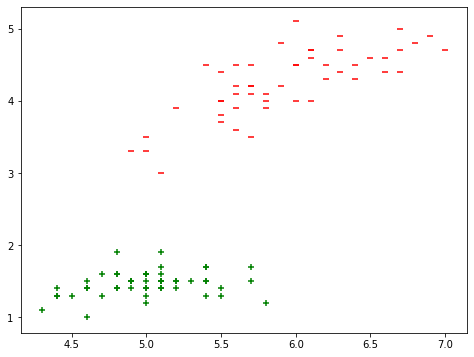

In [91]:
import matplotlib.pyplot as plt

x = df['sepal-length']
y = df['petal-length']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()



In [93]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
## Drop rest of the features and extract the target values
df = df.drop(['sepal-width','petal-width'],axis=1)
Y = []
target = df['class']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['class'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)


In [105]:
import numpy as np

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.001

while(epochs < 1000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

1.0 5.1


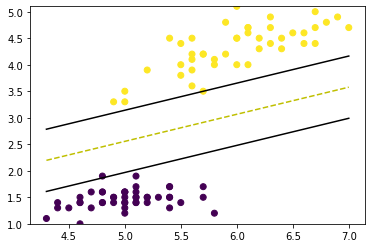

In [142]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(train_f1, train_f2, marker='o',c=y_train)



def get_hyperplane_value(x, w1,w2, b, offset):
          return (-w1[0] * x + b + offset) / w2[1]

x0_1 = np.amin(x_train[:,0])
x0_2 = np.amax(x_train[:,0])
x1_1 = get_hyperplane_value(x0_1,w1,w2, cost, 0)
x1_2 = get_hyperplane_value(x0_2,w1,w2, cost, 0)
x1_1_m = get_hyperplane_value(x0_1,w1,w2, cost, -1)
x1_2_m = get_hyperplane_value(x0_2, w1,w2, cost, -1)
x1_1_p = get_hyperplane_value(x0_1, w1,w2, cost, 1)
x1_2_p = get_hyperplane_value(x0_2,w1,w2, cost, 1)

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')
x1_min = np.amin(x_train[:,1])
x1_max = np.amax(x_train[:,1])
print(x1_min,x1_max)
ax.set_ylim([x1_min,x1_max])
plt.show()


In [115]:
cost

0

In [100]:
print(w1)

[[-0.90473679]
 [-0.90473679]
 [-0.90473679]
 [-0.90473679]
 [-0.90473679]
 [-0.90473679]
 [-0.90473679]
 [-0.90473679]
 [-0.90473679]
 [-0.90473679]]
